In [ ]:
Aisha Beevi K M                                                                                         30-9-2022

# KNN-2 Telco-Customer-Churn

In [33]:
import numpy as np
import pandas as pd
!pip install scikit-learn
df=pd.read_csv('Telco-Customer-Churn.csv')
print(df)

Defaulting to user installation because normal site-packages is not writeable
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0     

In [14]:
#df.drop('customerID', axis=1,inplace=True)

In [34]:
df["TotalCharges"]=pd.to_numeric(pd.to_numeric(df["TotalCharges"], errors='coerce'))
df=df.dropna()

In [36]:
Y=df['Churn']
df.drop('Churn', axis=1,inplace=True)
print(Y)

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object


In [37]:
df.drop('customerID', axis=1,inplace=True)

In [38]:
cols=df.columns
print(cols)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [45]:
le=LabelEncoder()
Y=le.fit_transform(Y)
print(Y)

[0 0 1 ... 0 1 0]


In [39]:
x=df
print(df)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [40]:
label_encoder_x=LabelEncoder()
x.iloc[:, 0]= label_encoder_x.fit_transform(x.iloc[:, 0])
x.iloc[:, 1]= label_encoder_x.fit_transform(x.iloc[:, 1])
x.iloc[:, 2]= label_encoder_x.fit_transform(x.iloc[:, 2])
x.iloc[:, 3]= label_encoder_x.fit_transform(x.iloc[:, 3])
x.iloc[:, 4]= label_encoder_x.fit_transform(x.iloc[:, 4])
x.iloc[:, 5]= label_encoder_x.fit_transform(x.iloc[:, 5])
x.iloc[:, 6]= label_encoder_x.fit_transform(x.iloc[:, 6])
x.iloc[:, 7]= label_encoder_x.fit_transform(x.iloc[:, 7])
x.iloc[:, 8]= label_encoder_x.fit_transform(x.iloc[:, 8])
x.iloc[:, 9]= label_encoder_x.fit_transform(x.iloc[:, 9])
x.iloc[:, 10]= label_encoder_x.fit_transform(x.iloc[:, 10])
x.iloc[:, 11]= label_encoder_x.fit_transform(x.iloc[:, 11])
x.iloc[:, 12]= label_encoder_x.fit_transform(x.iloc[:, 12])
x.iloc[:, 13]= label_encoder_x.fit_transform(x.iloc[:, 13])
x.iloc[:, 14]= label_encoder_x.fit_transform(x.iloc[:, 14])
x.iloc[:, 15]= label_encoder_x.fit_transform(x.iloc[:, 15])
x.iloc[:, 16]= label_encoder_x.fit_transform(x.iloc[:, 16])
#x.iloc[:, 17]= label_encoder_x.fit_transform(x[:, 17])

#x[:, 18]= label_encoder_x.fit_transform(x[:, 18])
#x[:, 0]= label_encoder_x.fit_transform(x[:, 0])

print(x)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       0             0   
1          1              0        0           0      33             1   
2          1              0        0           0       1             1   
3          1              0        0           0      44             0   
4          0              0        0           0       1             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      23             1   
7039       0              0        1           1      71             1   
7040       0              0        1           1      10             0   
7041       1              1        1           0       3             1   
7042       1              0        0           0      65             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [41]:
x=df
one_hot_encoding_columns=[ 'MultipleLines', 'InternetService', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod', 'DeviceProtection' ]
x=pd.get_dummies(x,columns=one_hot_encoding_columns)
print(x)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       0             0   
1          1              0        0           0      33             1   
2          1              0        0           0       1             1   
3          1              0        0           0      44             0   
4          0              0        0           0       1             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      23             1   
7039       0              0        1           1      71             1   
7040       0              0        1           1      10             0   
7041       1              1        1           0       3             1   
7042       1              0        0           0      65             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_0  ...  \
0                    1           

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x, Y, test_size=0.25, random_state=0)


In [43]:
from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[0. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


In [50]:
from sklearn.neighbors import KNeighborsClassifier
Classifier=KNeighborsClassifier(n_neighbors=5)
Classifier.fit(x_train,y_train)
y_pred=Classifier.predict(x_test)
print(y_pred)

['No' 'No' 'No' ... 'Yes' 'No' 'No']


In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=Classifier.classes_)
print(cm)

[[1111  200]
 [ 216  231]]


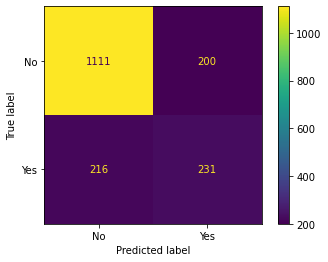

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=Classifier.classes_)
disp.plot()

In [54]:
training_score = Classifier.score(x_train, y_train)
test_score = Classifier.score(x_test, y_test)
print(training_score)
print(test_score)

0.8282138794084186
0.7633674630261661


2 : [0.8581721653394009, 0.7559726962457338]
3 : [0.8558968524838833, 0.7417519908987485]
4 : [0.8386423966628744, 0.767349260523322]
5 : [0.8282138794084186, 0.7633674630261661]
6 : [0.8244216913158893, 0.7838452787258248]
7 : [0.820250284414107, 0.7696245733788396]
8 : [0.8179749715585893, 0.7861205915813424]
9 : [0.8122866894197952, 0.7775881683731513]
10 : [0.810580204778157, 0.7821387940841866]
11 : [0.8141827834660599, 0.7753128555176336]
12 : [0.8109594235874099, 0.7753128555176336]
13 : [0.8064087978763747, 0.7815699658703071]
14 : [0.8081152825180129, 0.7878270762229806]
15 : [0.8102009859689041, 0.7838452787258248]
16 : [0.8064087978763747, 0.7872582480091013]
17 : [0.8020477815699659, 0.7792946530147895]
18 : [0.801668562760713, 0.7861205915813424]
19 : [0.7973075464543041, 0.7810011376564278]
20 : [0.7992036405005688, 0.785551763367463]
21 : [0.7963594994311718, 0.7878270762229806]
22 : [0.7957906712172924, 0.7861205915813424]
23 : [0.7957906712172924, 0.7832764505119454]


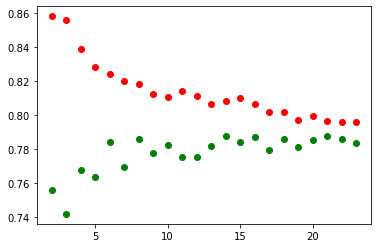

In [59]:
K = []
training = []
test = []
scores = {}
for k in range(2, 24):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

for keys, values in scores.items():
    print(keys, ':', values)

import matplotlib.pyplot as plt
plt.scatter(K,training,color='red')
plt.scatter(K,test,color='green')
plt.show()